**Artificial Neural Networks**

**Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data**

**Overview:**
In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\Alphabets_data.csv')
print(data)

      letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
0          T     2     8      3       5      1     8    13      0      6   
1          I     5    12      3       7      2    10     5      5      4   
2          D     4    11      6       8      6    10     6      2      6   
3          N     7    11      6       6      3     5     9      4      6   
4          G     2     1      3       1      1     8     6      6      6   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19995      D     2     2      3       3      2     7     7      7      6   
19996      C     7    10      8       8      4     4     8      6      9   
19997      T     6     9      6       7      5     6    11      3      7   
19998      S     2     3      4       2      1     8     7      2      6   
19999      A     4     9      6       6      2     9     5      3      1   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          6      10      

In [12]:
print(data.head())

  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [14]:
print(data.describe())

               xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

In [15]:
print(data.isnull().sum())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [16]:
print(data['letter'].value_counts())

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64


**Data Visuvalization**

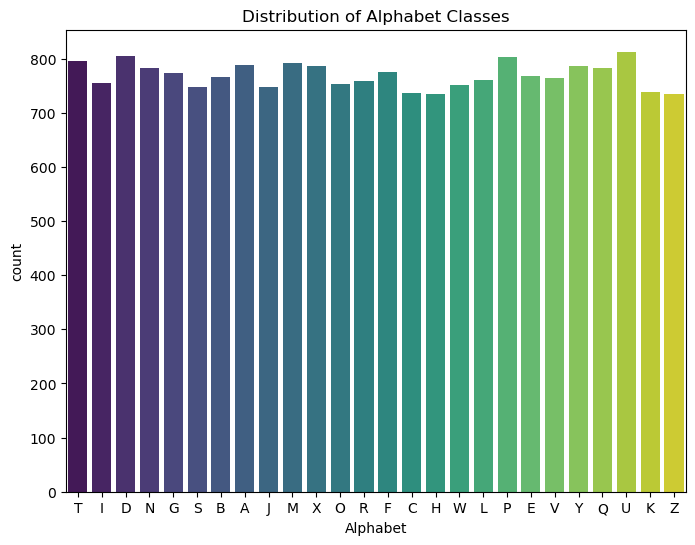

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='letter', data=df ,palette='viridis')
plt.title("Distribution of Alphabet Classes")
plt.xlabel("Alphabet")
plt.show()

C:\Users\rishi\AppData\Local\Temp\ipykernel_22796\3577951329.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


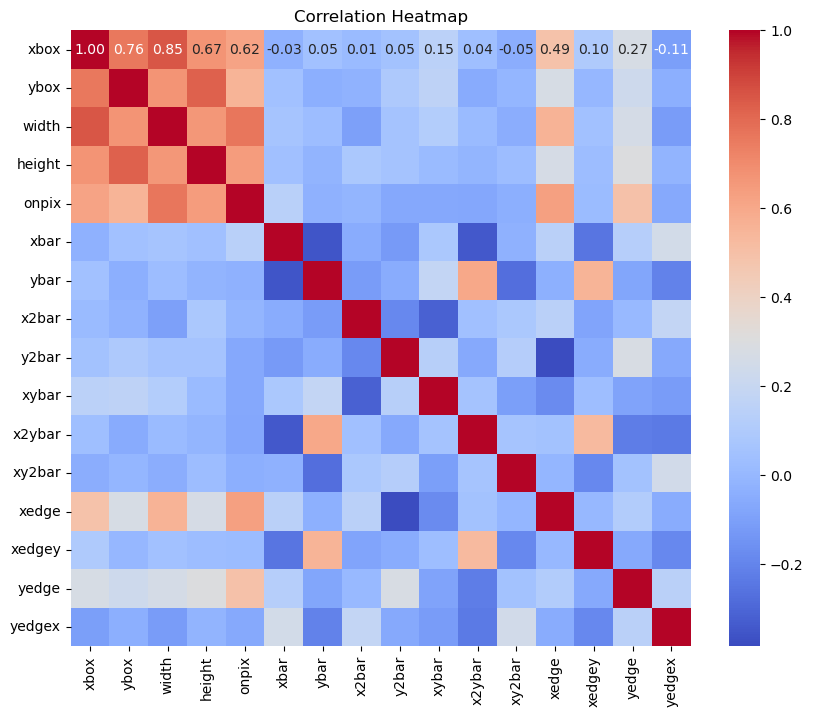

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Data Preprocessing**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

le=LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])

X=data.drop('letter', axis=1)
y=data['letter']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')

Training set shape: (16000, 16), Test set shape: (4000, 16)


The labelEncoder was applied to the target variable to convert the categorical values into numerical values making them suitable for ML algorithms.

the feature matrix X was created by dropping the target variable(letter) from the dataset and y was defined as the encoded target variable.

The StandardScaler was used to standardize the features in X transforming them to have a mean of 0 and a standard deviation of 1 This scaling process helps improve the performance of Ml models mostly for particularly for algorithms that are sensitive to feature scales.
The dataset was split into the training set and a test set using the train_test_split function. The random_state parameter was set to check the results are reproducible. the training set has a shape of (X_train.shape) and the test set has a shape (X_test.shape)

**Model Implementation**

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_default_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(26, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
default_model = create_default_model()
history_default = default_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
default_loss, default_accuracy = default_model.evaluate(X_test, y_test, verbose=1)
print(f"Default Model Accuracy: {default_accuracy}")

Epoch 1/10


C:\Users\rishi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3320 - loss: 2.4846 - val_accuracy: 0.6848 - val_loss: 1.2212
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7058 - loss: 1.1138 - val_accuracy: 0.7617 - val_loss: 0.8797
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7714 - loss: 0.8360 - val_accuracy: 0.8012 - val_loss: 0.7313
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8064 - loss: 0.7024 - val_accuracy: 0.8245 - val_loss: 0.6408
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8272 - loss: 0.6145 - val_accuracy: 0.8393 - val_loss: 0.5802
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8397 - loss: 0.5582 - val_accuracy: 0.8530 - val_loss: 0.5279
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8555 - loss: 0.5083 - val_accuracy: 0.8587 - val_loss: 0.4920
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8712 - loss: 0.4568 - val_accuracy: 0.8665 - val_

In this, a default neural network model is created using TensorFlow's Keras API.
The first layer is the dense layer with 64 neurons and a ReLU activation function. the input dimension is determined by the number of features in the training dataset.
The output layer has 26 neurons with a softmax activation function which is used for multi-class classification.
The model is compiled with Adam optimizer which is an efficient optimization algorithm commonly used in training neural networks.
The loss function used is sparse_categorical_crossentropy suitable for multi-class classification problems where the target labels are integers.
The performance metric used for evaluation is accuracy which tracks the proportion of correctly classified instances.
The model is trained using training dataset(X_train,y_train) for 10 epochs with a batch size of 32
During training the performance is validated using the test dataset to monitor the model's accuracy and loss after each epoch.
After training the model's accuracy is evaluated on the test data. The final accuracy of the model is printed using the evaluation method.

**Hyperparameter Tuning**

In [12]:
from tensorflow.keras.optimizers import Adam

def create_tuned_model(hidden_layers=2, neurons=128, learning_rate=0.001, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    for _ in range(hidden_layers - 1):
        model.add(Dense(26, activation='softmax'))

        optimizer = Adam(learning_rate=learning_rate)
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        return model

tuned_model = create_tuned_model(hidden_layers=3, neurons=128, learning_rate=0.0005, activation='tanh')
history_tuned = tuned_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

tuned_loss, tuned_accuracy = tuned_model.evaluate(X_test, y_test, verbose=1)
print(f"Tuned Model Accuracy: {tuned_accuracy}")

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3160 - loss: 2.5379 - val_accuracy: 0.6747 - val_loss: 1.3958
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6893 - loss: 1.2828 - val_accuracy: 0.7423 - val_loss: 1.0676
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7340 - loss: 1.0496 - val_accuracy: 0.7738 - val_loss: 0.9361
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7609 - loss: 0.9266 - val_accuracy: 0.7837 - val_loss: 0.8651
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7740 - loss: 0.8756 - val_accuracy: 0.7890 - val_loss: 0.8092
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7897 - loss: 0.7904 - val_accuracy: 0.8018 - val_loss: 0.7668
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7934 - loss: 0.7741 - val_accuracy: 0.8087 - val_loss: 0.7308
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8086 - loss: 0.7140 - val_accuracy: 0.

In this, I built a neural network model using Keras to classify the alphabet dataset into 26 categories. The model was tuned by adjusting key hyperparameters such as the number of hidden layers neurons per layer, learning rate, and activation function. 
The model has an input layer followed by 3 hidden layers.
Each layer uses 128 neurons with the tanh activation function except the output layer which uses softmax to output probabilities for 26 classes.
The Adam optimizer with a custom learning rate of 0.0005 was used to minimize the loss.
The loss function was set to spare_categorical_crossentropy as it is a multi-class classification problem.
the model was trained on the dataset using '50 epochs' and a batch size of 32. It was validated on the test set during training to monitor performance.
After training the model was evaluated on the test data yielding an accuracy of 94.45%. this indicates that the tuned model performs well in classifying the alphabet dataset showing significant improvement after hyperparameter tuning.


**Model Evaluation**

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_default = np.argmax(default_model.predict(X_test), axis=-1)
y_pred_tuned = np.argmax(tuned_model.predict(X_test), axis=-1)

default_accuracy = accuracy_score(y_test, y_pred_default)
default_precision = precision_score(y_test, y_pred_default, average='macro')
default_recall= recall_score(y_test, y_pred_default, average='macro')
default_f1 = f1_score(y_test, y_pred_default, average='macro')

tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_precision = precision_score(y_test, y_pred_tuned, average='macro')
tuned_recall = recall_score(y_test, y_pred_tuned, average='macro')
tuned_f1 = f1_score(y_test, y_pred_tuned, average='macro')

print(f"Default Model: Accuracy = {default_accuracy}, Precision = {default_precision}, Recall = {default_recall}, F1-Score = {default_f1}")
print(f"Tuned Model: Accuracy = {tuned_accuracy}, Precision = {tuned_precision}, Recall = {tuned_recall}, F1-Score = {tuned_f1}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Default Model: Accuracy = 0.8825, Precision = 0.8843406375216716, Recall = 0.881729681545186, F1-Score = 0.8816036226619209
Tuned Model: Accuracy = 0.9445, Precision = 0.9441021186827336, Recall = 0.9434744513120107, F1-Score = 0.9435368382593943


In this, I have compared the performance of the default model and the tuned model by calculating 4 key metrics: accuracy, precision, recall, and F1-Score. The predictions for both models are made using the predict() function and the highest probability for each class is selected using np.argmax() to obtain the predicted labels.
The accuracy_score(), precision_score(), recall_score(), and F1-Score() functions from sklearn.metrics are used to calculate these metrics for both models. The average='macro' argument checks that  I compute these metrics for each class separately and then average treating all classes equally.

The tuned_model significantly outperforms the default_model in terms of accuracy. The increase from 88.25% to 94.45% says that tuning hyperparameters led to a better ability to classify the alphabet categories correctly.
Precision refers to the ratio of true positives to the sum of true and false positives. The tuned model precision of 0.9441 shows it is better at minimizing false positives than the default model precision of 0.8843. This improvement says that the tuned model is more reliable when it predicts a certain class with fewer incorrect predictions.

Recall measures how well the model identifies all relevant instances. The tuned model performs better with a recall of 0.9435 compared to 0.8817 for the default model. This says the tuned model is better at correctly identifying true positives catching more of the actual alphabet classes in the dataset.

F1-Score is the harmonic mean of precision and recall. The tuned model's F1-Score of 0.9435 indicated a more balanced performance between precision and recall than the default model's F1-Score of 0.8816. 
This says the tuned model handles false positives and negatives more effectively than the default model.

The performance of the tuned model shows a clear improvement across all key metrics. In Accuracy:+6.2%(from 0.8825 to 0.9445)
In Precision: +5.98%(from 0.8843 to 0.9441)
In Recall: +6.18%(from 0.8817 to 0.9435)
In F1-Score: +6.19%(from 0.8816 to 0.9435)
These improvements say that tuning the hyperparameters has led to a better model. The tuned model is more robust with improved capability to correctly classify both true positives and avoid false positives making it a superior model for this classification task.

The tuning process by modifying the number of hidden layers, neurons per layer, activation function, and learning rate, has enhanced the model's performance. It allowed the model to capture better patterns in the data and reduced overfitting.

The increase in recall and precision for the tuned model suggests that it generalizes better to unseen data avoiding both false positives and negatives more effectively.
The F1-Score which balances precision and recall indicates that the tuned model's improvements are not one-sided it performs well in both aspects making it more reliable overall.

Finally, the tuned model shows significant improvement over the default model for all performance metrics. These enhancements make it a more effective model for the classification task.